Code: Alexis Aubel (alexis.aubel@gmail.com)

In [1]:
sim_name = [
    'RUN007_NoWind_JungI2p0_100day_Hourly',                   #Hourly, 3D, with MFx, Jung (NoWind but abs. value added to surface fluxes)
    #'RUN024_NoWind_JungI2p0_100day_Hourly_noMOMflx',          #Hourly, 3D, with MFx, Jung (NoWind but abs. value added to surface fluxes), NoMF (Removing avg. wind for MF)
    'RUN025_NoWind_JungI2p0_100day_Hourly_noSFCflx',          #Hourly, 3D, with MFx, Jung (NoWind but abs. value added to surface fluxes), NoHF (Removing avg. wind for HF)
]

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import Utils as utils

In [3]:
sim_nb = len(sim_name)
dataset_1D, dataset_2D = utils.import_from_name(sim_name)

In [4]:
############################################ COORDINATES ############################################
t = []
x = []
y = []
GRID_SIZE = []
for case in range(sim_nb):
    t.append(dataset_2D[case].coords['time'].values)
    x.append(dataset_2D[case].coords['x'].values)
    y.append(dataset_2D[case].coords['y'].values)
    GRID_SIZE.append(x[case][-1])

In [5]:
############################################# VARIABLES #############################################
PW = []
for case in range(sim_nb):
    PW.append(np.array(dataset_2D[case]['PW']))

In [6]:
#Computing the PW Barycentre
cloud_center = []
for case in range(sim_nb):
    cloud_center.append(np.array(utils.compute_barycenter_list(PW[case], GRID_SIZE[case], tolerance=.7)))

In [7]:
def moving_average(x, w):
    return np.concatenate([x[:w-1],np.convolve(x, np.ones(w), "valid") / w])

meso_speed = []
for case in range(sim_nb):
    meso_speed.append(moving_average(np.gradient(cloud_center[case][:, 0], t[case][:len(cloud_center[case][:, 0])]*24*3600, axis=0),15))
    if 'Jung' in sim_name[case]:
        meso_speed[case]+=utils.extract_speed(sim_name[case])

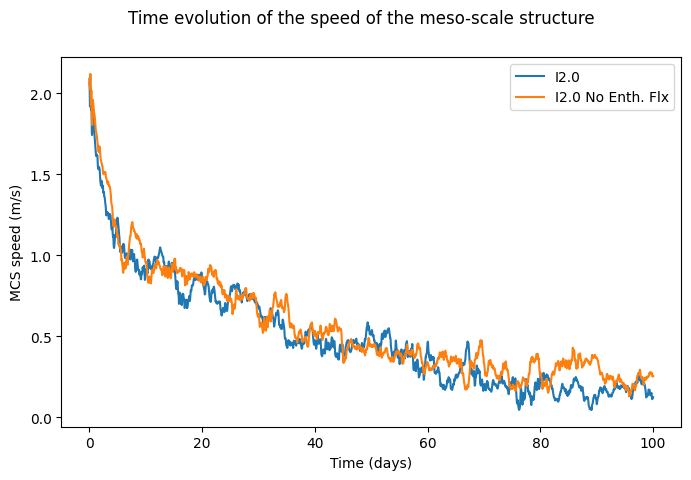

In [10]:
fig, axis = plt.subplots(1,1)
fig.set_figwidth(8)
lgd= ['I2.0',
      #'I2.0 No Mom. Flx', 
      'I2.0 No Enth. Flx']

for case in range(sim_nb):
    axis.plot(t[case][:len(cloud_center[case][:, 0])]-100, meso_speed[case], label=lgd[case])#utils.get_sim_desc(sim_name[case]))

########################################## DISPLAY ##########################################
axis.set_xlabel("Time (days)")
axis.set_ylabel("MCS speed (m/s)")
axis.legend()
plt.suptitle("Time evolution of the speed of the meso-scale structure")
plt.show()